In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [24]:
df_test = pd.read_csv("test-full.csv")
df_train = pd.read_csv("train.csv")
# pour avoir cover type au début
df_train = df_train[[df_train.columns[-1]] + list(df_train.columns[0:-1])]

In [25]:
df_train.shape, df_test.shape

((15120, 56), (581012, 55))

In [26]:
df_test.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,0
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,0
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,0
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,0
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,0


In [27]:
df_train["Cover_Type"].value_counts()

1    2160
2    2160
3    2160
4    2160
5    2160
6    2160
7    2160
Name: Cover_Type, dtype: int64

### Basis script

In [28]:
from sklearn.ensemble import RandomForestClassifier

# Separate features and target 
X_train = df_train.drop('Cover_Type', axis=1)
y_train = df_train['Cover_Type']

# Initialize and train a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Creating a Test dataset
X_test = df_test

# Make predictions on the test dataset
y_pred = clf.predict(X_test)

# Saving predictions to a CSV file
predictions_df = pd.DataFrame({'Cover_Type': y_pred})

# Having it fit the desired format
Id = [i for i in range (1, 581013)]
predictions_df['Id'] = Id
# predictions_df.to_csv('test_predictions.csv', index=False) # peut-être plus simple de directement mettre index = True


In [29]:
predictions_df["Cover_Type"].value_counts()

2    236112
1    216326
3     38178
7     31667
5     28425
6     26278
4      4026
Name: Cover_Type, dtype: int64

### First train-test

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Si on met que la df en input
def RF_classif(df_train=df_train):
    
    if "Wilderness_Area_Synth" in df_train.columns:
        df_train = df_train.drop(columns="Wilderness_Area_Synth")

    # Separate features and target 
    X_train = df_train.drop('Cover_Type', axis=1)
    y_train = df_train['Cover_Type']

    data_train, data_test, target_train, target_test = train_test_split(
        X_train, y_train, test_size = 0.2
    )

    # Initialize and train a Random Forest classifier
    clf = RandomForestClassifier(n_estimators=150)
    clf.fit(data_train, target_train)

    # Make predictions on the test dataset
    y_pred = clf.predict(data_test)
    
    return target_test, y_pred

# Si test & train déjà définis
def RF_classif_train_test(data_train, target_train, data_test, target_test):

    # Initialize and train a Random Forest classifier
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(data_train, target_train)

    # Make predictions on the test dataset
    y_pred = clf.predict(data_test)
    
    return target_test, y_pred

In [31]:
y_true, y_pred = RF_classif()
accuracy_score(y_true, y_pred) # bien meilleur score que sur Kags

0.8736772486772487

In [32]:
pd.DataFrame(sorted(np.stack([clf.feature_names_in_, clf.feature_importances_* 100]).T, key=lambda x: x[1], reverse=True))

,0,1
0,Elevation,20.632355
1,Id,13.322041
2,Horizontal_Distance_To_Roadways,8.330502
3,Horizontal_Distance_To_Fire_Points,6.130473
4,Horizontal_Distance_To_Hydrology,4.918169
5,Wilderness_Area4,4.871603
6,Vertical_Distance_To_Hydrology,4.423837
7,Hillshade_9am,4.357751
8,Aspect,4.033937
9,Hillshade_3pm,3.803219


In [33]:
print(classification_report(y_true, y_pred))

# On prédit moins bien 1 et 2, ce qui est un problème pcq représentent une immense majorité du dataset final

              precision    recall  f1-score   support

           1       0.79      0.76      0.78       427
           2       0.82      0.73      0.77       422
           3       0.84      0.86      0.85       429
           4       0.93      0.98      0.96       431
           5       0.92      0.96      0.94       419
           6       0.88      0.86      0.87       478
           7       0.92      0.96      0.94       418

    accuracy                           0.87      3024
   macro avg       0.87      0.87      0.87      3024
weighted avg       0.87      0.87      0.87      3024



In [34]:
a = pd.DataFrame(pd.DataFrame(y_true).value_counts(), columns=["True"])
b = pd.DataFrame(pd.DataFrame(y_pred).value_counts(), columns=["Pred"])

a.loc[range(1,8)], b.loc[range(1,8)]    #### ON A TENDENCE A SOUS PREDIRE 2, pq ????

(            True
 Cover_Type      
 1            427
 2            422
 3            429
 4            431
 5            419
 6            478
 7            418,
    Pred
 0      
 1   414
 2   375
 3   436
 4   456
 5   438
 6   468
 7   437)

# Looking into the data

<Axes: >

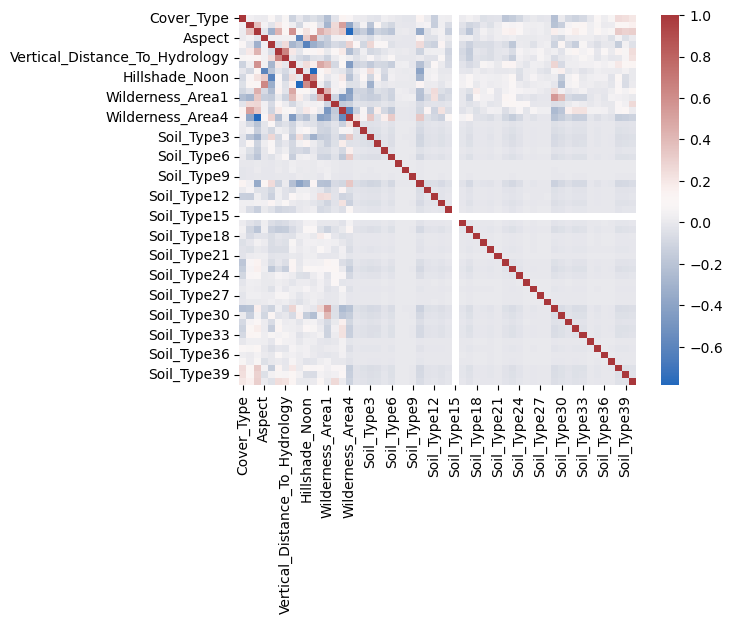

In [35]:
sns.heatmap(df_train.corr(), cmap = 'vlag') ## sans les soils sinon illisble

<Axes: >

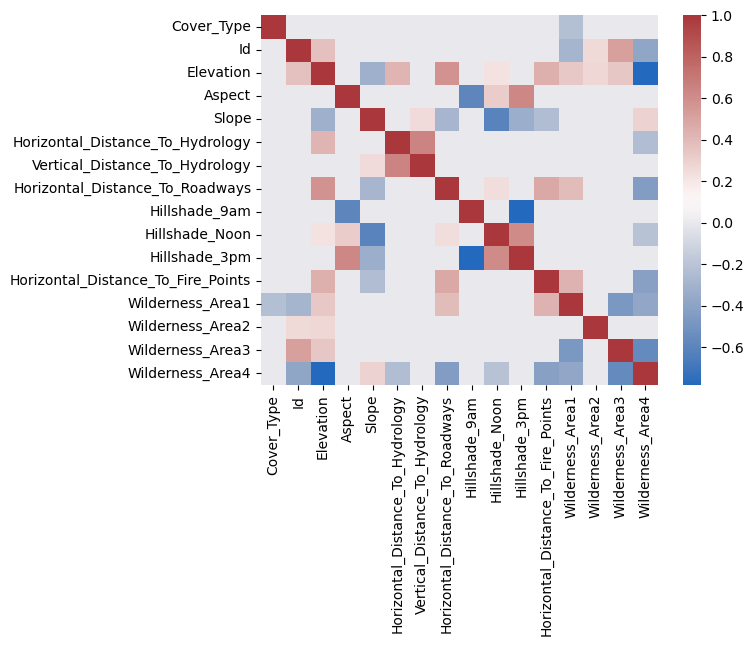

In [36]:
df_train_ns = df_train.iloc[:,:16]


sns.heatmap((abs(df_train_ns.corr()) > 0.2) * df_train_ns.corr(), cmap='vlag') ## sans les soils sinon illisble

# EACH VARIABLE IN DETAIL

In [37]:
df_train["Cover_Type"].value_counts()

1    2160
2    2160
3    2160
4    2160
5    2160
6    2160
7    2160
Name: Cover_Type, dtype: int64

In [38]:
### Note: tout se passe comme si avaient samplé au hasard *de manière à avoir un balanced trained dataset*, 
# ce qui crée les irrégularités observées ci-dessous

- Wilderness Areas

In [39]:
wilderness_types = ["Wilderness_Area1", "Wilderness_Area2", "Wilderness_Area3", "Wilderness_Area4"]
(df_train[wilderness_types].sum() / len(df_train))

Wilderness_Area1    0.235979
Wilderness_Area2    0.037632
Wilderness_Area3    0.416799
Wilderness_Area4    0.309590
dtype: float64

In [40]:
(df_test[wilderness_types].sum() / len(df_test))

Wilderness_Area1    0.448865
Wilderness_Area2    0.051434
Wilderness_Area3    0.436074
Wilderness_Area4    0.063627
dtype: float64

In [41]:
### On voit que le WA4 est très surreprésenté dans le train vs le test. Inversement, le WA1 est sous-représenté
# => essayer dans un second temps de regarder WA par WA les erreurs

In [42]:
# Lien entre les classes et les  WA

In [43]:
df_train["Wilderness_Area_Synth"] = df_train[wilderness_types] @ [1, 2, 3, 4]

In [44]:
df_train[["Wilderness_Area_Synth"]].value_counts(normalize=True) # creating a new column for visibily (et le oversampling ensuite)

Wilderness_Area_Synth
3                        0.416799
4                        0.309590
1                        0.235979
2                        0.037632
dtype: float64

In [45]:
WA_CT = pd.DataFrame(index=range(1, 5), columns=range(1, 8))
for WA in range(1,5):
    for CT in range(1, 8):
        WA_CT.loc[WA, CT] = len(df_train[(df_train["Wilderness_Area_Synth"] == WA) & (df_train["Cover_Type"] == CT)])

In [46]:
### revenir sur ça plus tard, on voit que la surreprésentatin de W_4 par rapport à 
# W_1 entraîne effectivement bcp moins de classes 1-2 
WA_CT.T

,1,2,3,4
1,1068,237,855,0
2,1105,85,949,21
3,0,0,856,1304
4,0,0,0,2160
5,862,0,1298,0
6,0,0,964,1196
7,533,247,1380,0


- ID

In [47]:
a = 0
for i in df_train["Id"]:
    if i in df_test["Id"]:
        a += 1
print(a)

# les données du train sont contenues dans le full dataset !

15120


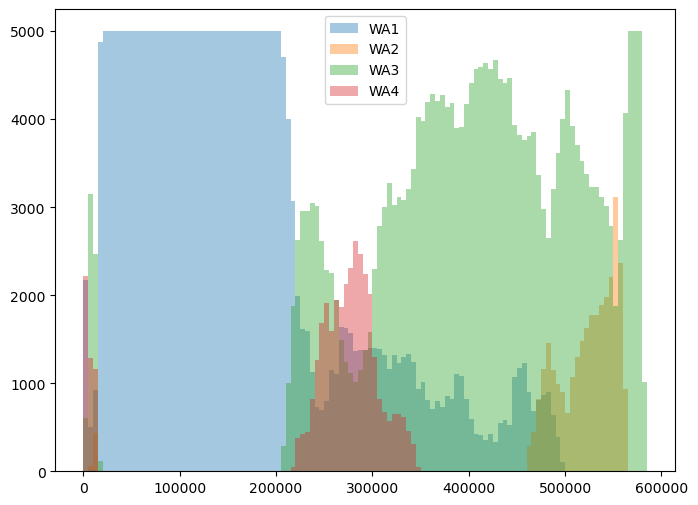

In [48]:
# Répartition des Ids par WA?

binwidth = 5_000

plt.figure(figsize=(8,6))
for i in range (1, 5):
    plt.hist(df_test[df_test[f"Wilderness_Area{i}"] == 1]["Id"], 
             bins=range(1, max(df_test['Id']) + binwidth, binwidth), label=f"WA{i}", alpha=0.4)
    plt.legend()
    
# pour le rapport être nice de représenter ça avec des stacked bars pour voir la proportion sur chaque bin
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_stacked.html

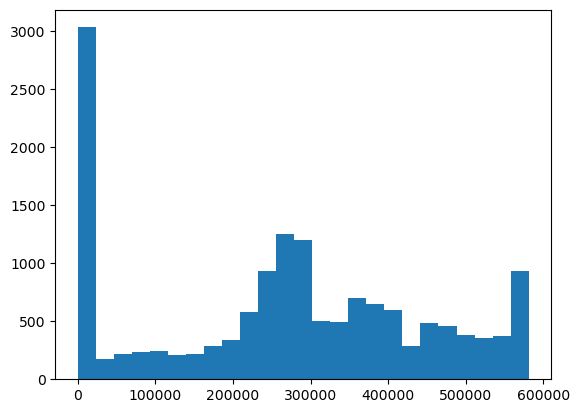

In [49]:
plt.hist(df_train["Id"], bins='auto')
plt.show()
# on voit que on a démesurément pris des Id dans des endroits où le WA est 3 (tout début et milieu)

- Elevation

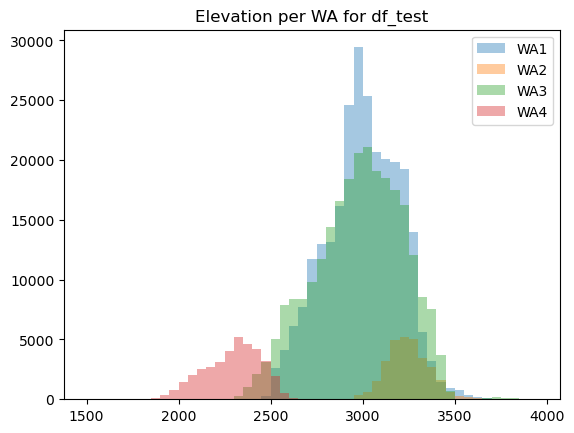

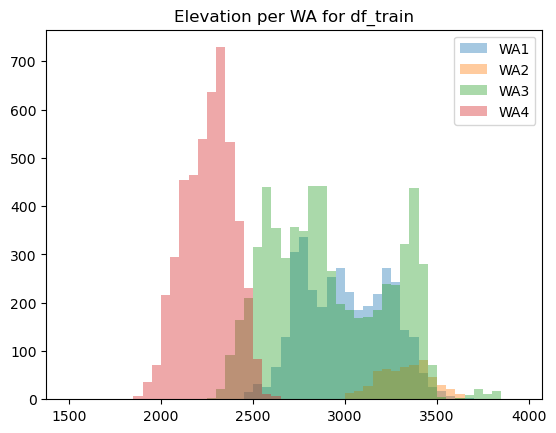

In [50]:
dico = {"df_test": df_test, "df_train": df_train}

for df in dico:
    for i in range(1, 5):
        plt.hist(dico[df][dico[df][f"Wilderness_Area{i}"] == 1]["Elevation"], 
                label=f"WA{i}", alpha=0.4, bins=range(1500, 4000, 50))
    plt.title(f"Elevation per WA for {df}")
    plt.legend()
    plt.show()

In [51]:
### Au delà de la surreprésentation de W4, intéressant de voir que même au sein de WA1 et WA2 on n'a pas samplé uniformément 
# : il manque le pic autour de 3000

- Aspect

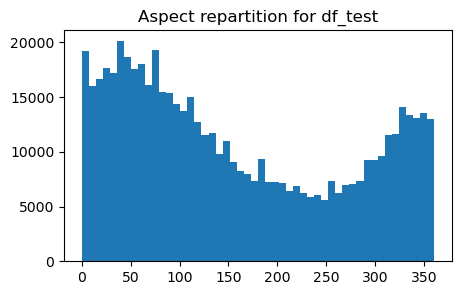

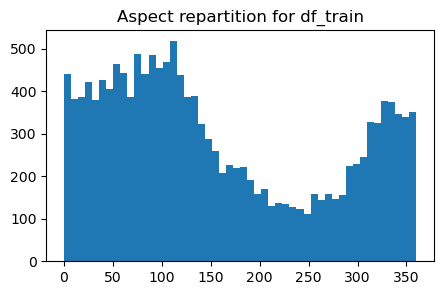

In [52]:
# C'est l'azimuth de la pente, ie en gros l'angle du gradient de la montagne (0° pour pente nord etc)
# logiquement très corrélé avec les hillshades

for df in dico:
    plt.figure(figsize=(5, 3))
    plt.hist(dico[df]["Aspect"], bins=50)
    plt.title(f"Aspect repartition for {df}")
    plt.show()
    
# Ici ok

- Slope

In [53]:
for i, df in enumerate(dico):
    print(i, df)

0 df_test
1 df_train


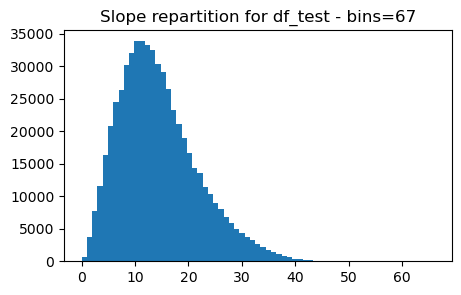

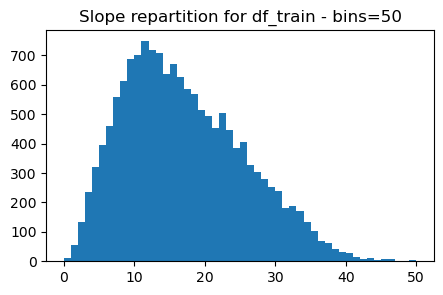

In [54]:
bins = [67, 50]
for df, bin in zip(dico, bins):
    plt.figure(figsize=(5,3))
    plt.hist(dico[df]["Slope"], bins=bin)
    plt.title(f"Slope repartition for {df} - bins={bin}")
    plt.show()


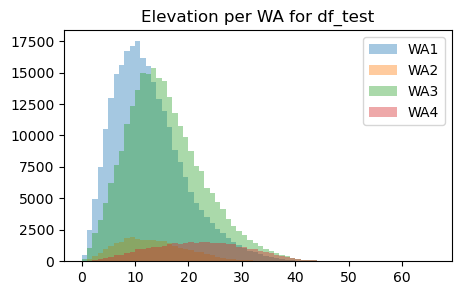

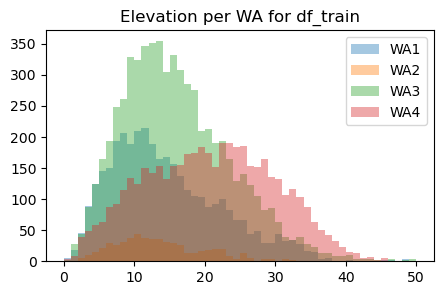

In [55]:
for df in dico:
    plt.figure(figsize=(5,3))
    for i in range(1, 5):
        a = dico[df][dico[df][f"Wilderness_Area{i}"] == 1]["Slope"]
        plt.hist(a, label=f"WA{i}", alpha=0.4, bins=range(min(a), max(a) + 1))
    plt.title(f"Elevation per WA for {df}")
    plt.legend()
    plt.show()

In [56]:
### Les pics observés sur le ydata_profiling sont dûs à des mauvais binages plutôt qu'à un pb dans la donnée
### comportement différent dû à l'absence d'homogénéité dans les WA

- Horizontal distances

In [57]:
distances = ["Horizontal_Distance_To_Hydrology", "Vertical_Distance_To_Hydrology", "Horizontal_Distance_To_Roadways"]

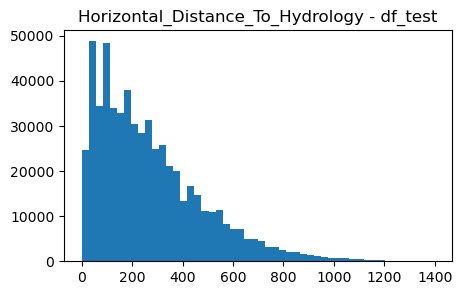

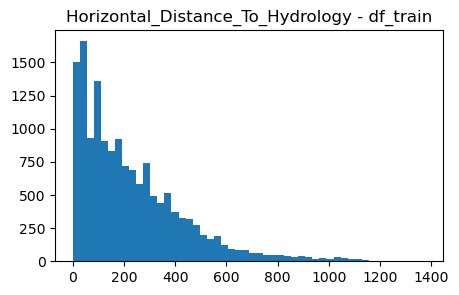

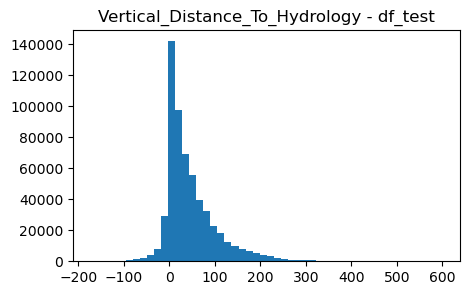

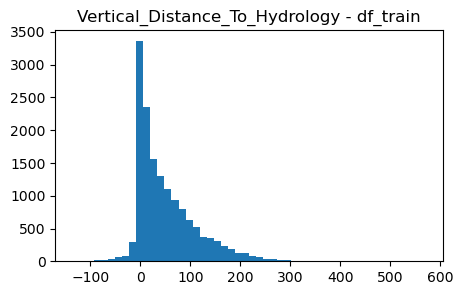

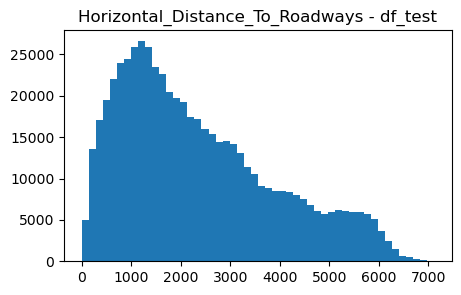

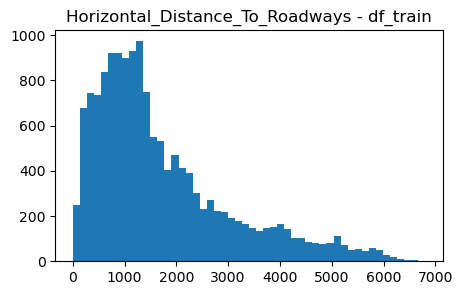

In [58]:
for distance in distances:
    for df in dico:
        plt.figure(figsize=(5, 3))
        plt.hist(dico[df][distance], bins=50)
        plt.title(f"{distance} - {df}")
        plt.show()

In [59]:
# Intérêt de horizontal distance to road? => pas intuitif mais on dirait que utile

In [60]:
df_no_road_dist = df_train.drop(columns="Horizontal_Distance_To_Roadways")

y_true, y_pred = RF_classif(df_no_road_dist)
accuracy_score(y_true, y_pred)

0.8700396825396826

- Hillshade

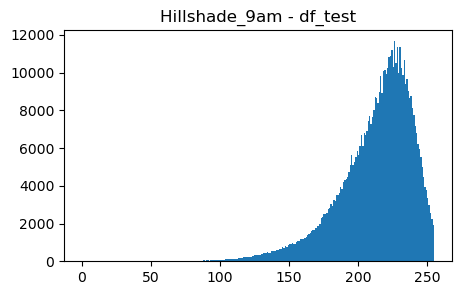

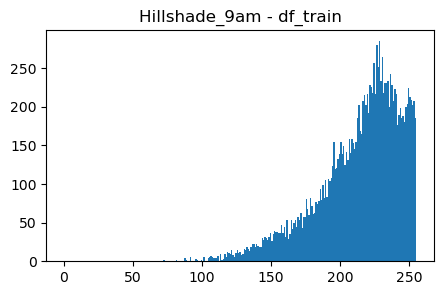

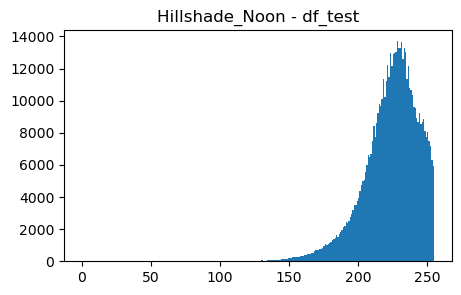

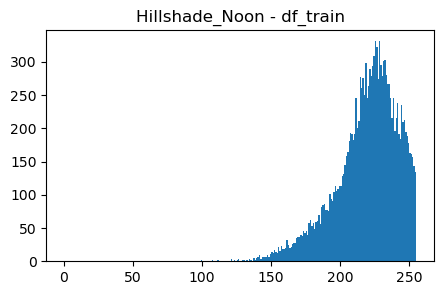

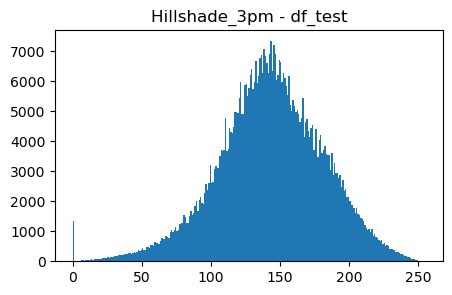

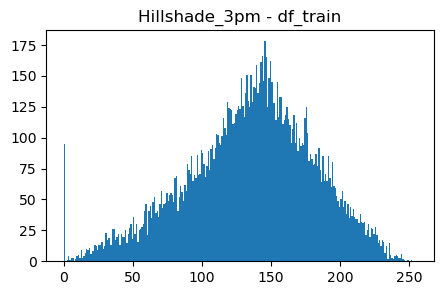

In [61]:
hillshades = ["Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm"]

for hillshade in hillshades:
    for df in dico:
        plt.figure(figsize=(5, 3))
        plt.hist(dico[df][hillshade], bins=range(256))
        plt.title(f"{hillshade} - {df}")
        plt.show()

- Distance to ignition point

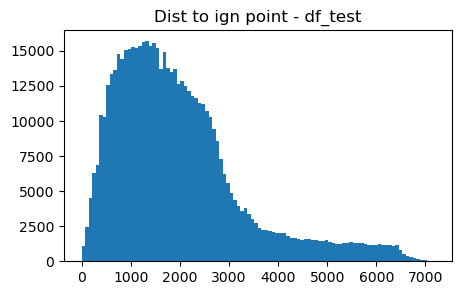

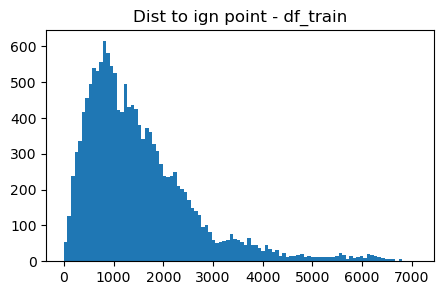

In [62]:
for df in dico:
    plt.figure(figsize=(5, 3))
    plt.hist(dico[df]["Horizontal_Distance_To_Fire_Points"], bins=100)
    plt.title(f"Dist to ign point - {df}")
    plt.show()

- Soil Types

In [63]:
soil_types = ["Soil_Type" + str(i) for i in range(1, 41)]
soils_train = pd.DataFrame(df_train[soil_types].sum() / len(df_train) * 100, columns=["Train"])
soils_test = pd.DataFrame(df_test[soil_types].sum() / len(df_test) * 100, columns=["Test"])

<Axes: >

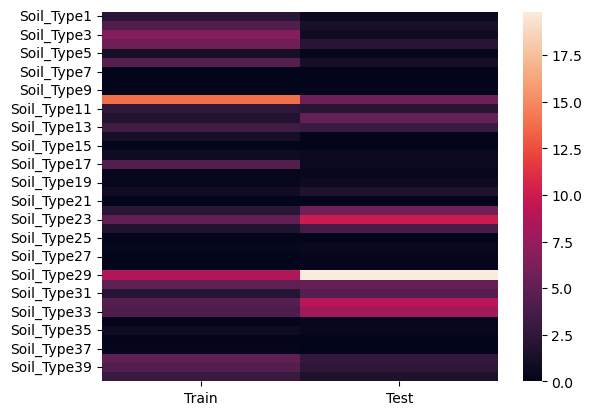

In [64]:
sns.heatmap(pd.merge(soils_train, soils_test, left_index=True, right_index=True))
# Ca ne colle pas, regarder si encore une fois lié aux WAs ou pas

In [65]:
### Certains sont à 5 => si on garde binner tous ceux en dessous de 200 ou qqc comme ça

<Axes: >

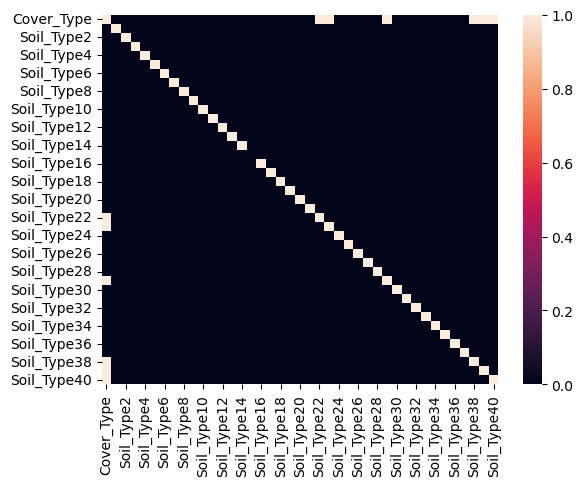

In [66]:
# Y en a-t-il des vraiment corrélés avec Cover type ? Pas beaucoup
sns.heatmap(abs(df_train[["Cover_Type"] + soil_types].corr()) > 0.15)

<Axes: >

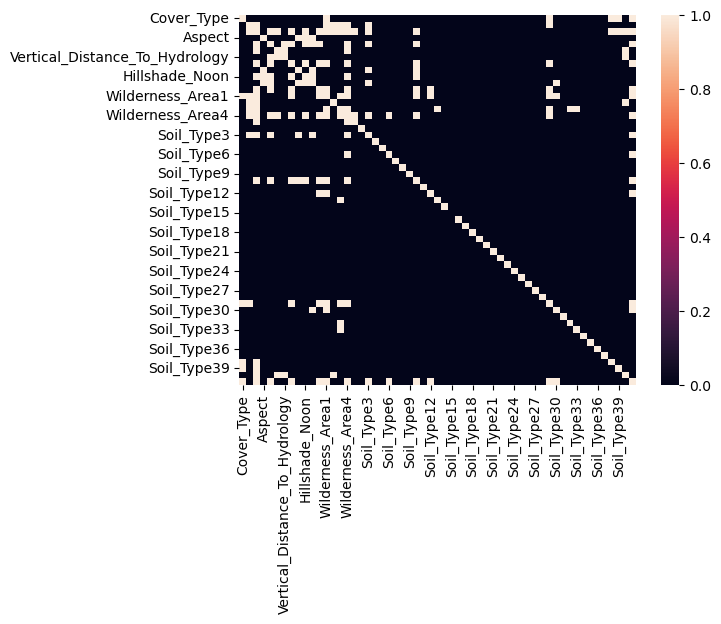

In [67]:
# Et avec les autres ? Pas énormes non plus à part ceux déjà repérés
sns.heatmap(abs(df_train.corr()) > 0.2)

In [68]:
#### Si on essaie sans les soil types

In [69]:
df_train_ns = df_train.iloc[:,:16]
y_true, y_pred = RF_classif(df_train_ns)

print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           1       0.81      0.75      0.78       462
           2       0.81      0.69      0.74       448
           3       0.84      0.85      0.85       403
           4       0.95      0.98      0.96       446
           5       0.89      0.95      0.92       439
           6       0.85      0.86      0.86       445
           7       0.89      0.99      0.94       381

    accuracy                           0.86      3024
   macro avg       0.86      0.87      0.86      3024
weighted avg       0.86      0.86      0.86      3024



In [70]:
### Ne change rien => faire sans pour l'instant, on verra ensuite comment biner

### Binning soil types

In [71]:
binned_soils = []

for soil in soil_types:
    if sum(df_train[soil]) < 200:
        binned_soils.append(soil)

In [72]:
def _soil_binned(X, binned_soils=binned_soils):
    X = X.copy()
    X['Soil_others'] = np.sum(X[binned_soils], axis=1)
    X.drop(columns=binned_soils, inplace=True)
    return X

In [73]:
y_true, y_pred = RF_classif(_soil_binned(df_train))
accuracy_score(y_true, y_pred)

0.8763227513227513

In [74]:
# ne change pas grand chose mais probablement plus propre

In [75]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           1       0.82      0.79      0.81       435
           2       0.79      0.71      0.75       423
           3       0.87      0.85      0.86       441
           4       0.92      0.98      0.95       406
           5       0.90      0.96      0.93       438
           6       0.87      0.86      0.87       446
           7       0.95      0.98      0.97       435

    accuracy                           0.88      3024
   macro avg       0.87      0.88      0.87      3024
weighted avg       0.87      0.88      0.87      3024

